In [96]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from functions import *

In [97]:
board = cv2.imread('cropped/2.jpg')
board = cv2.cvtColor(board, cv2.COLOR_BGR2RGB)


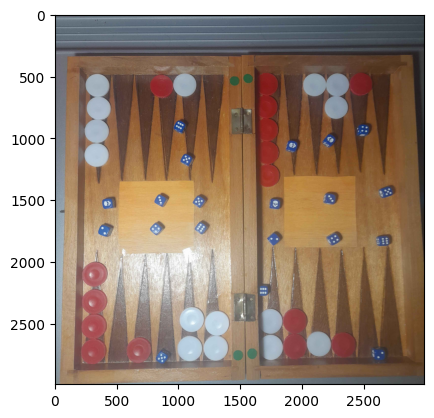

(2992, 2992, 3)

In [98]:
plt.imshow(board)
plt.show()
board.shape

In [99]:
board_ = np.array(board)
board_ = cv2.resize(board_, (1000,1000))

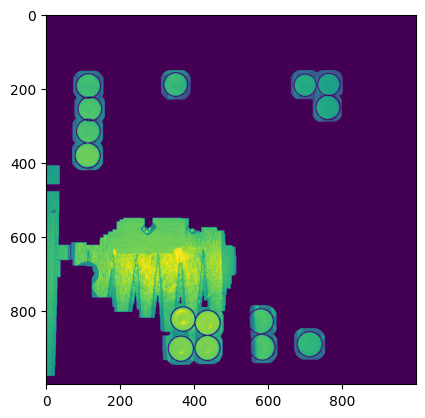

In [100]:
# detect white

epsilon = 130
white_upper_range = np.array([255,255,255])
white_lower_range = white_upper_range - epsilon

k = np.ones((11,11))
whitemask = cv2.inRange(board_, white_lower_range, white_upper_range)
whitemask = cv2.erode(whitemask, k)
whitemask = cv2.erode(whitemask, k)
whitemask = cv2.dilate(whitemask ,k)
whitemask = cv2.dilate(whitemask ,k)
whitemask = cv2.dilate(whitemask ,k)
whitemask = cv2.dilate(whitemask ,k)

whiteboard = np.array(board_)
whiteboard[whitemask==0] = 0
whiteboard = cv2.cvtColor(whiteboard, cv2.COLOR_RGB2GRAY)

minDist = 50
param1 = 30 #500
param2 = 30 #200 #smaller value-> more false circles
minRadius = 30
maxRadius = 40 #10


circles = cv2.HoughCircles(whiteboard,cv2.HOUGH_GRADIENT, 1, minDist, param1=param1, param2=param2, minRadius=minRadius, maxRadius=maxRadius)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
        cv2.circle(whiteboard, (i[0], i[1]), i[2], (0, 255, 0), 2)

# Show result for testing:
plt.imshow(whiteboard)
plt.show()


# contours, _ = cv2.findContours(whitemask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# white_pawns = np.array(board_)

# cv2.drawContours(white_pawns, contours, -1, (0, 255, 0), 2)

# plt.imshow(white_pawns)
# plt.show()

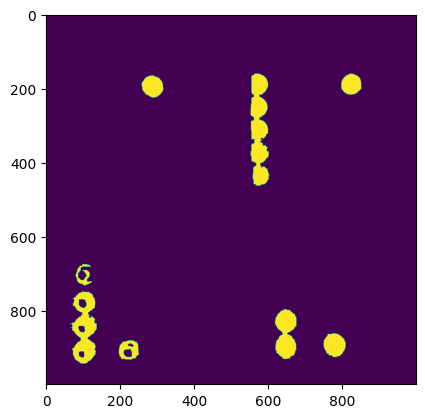

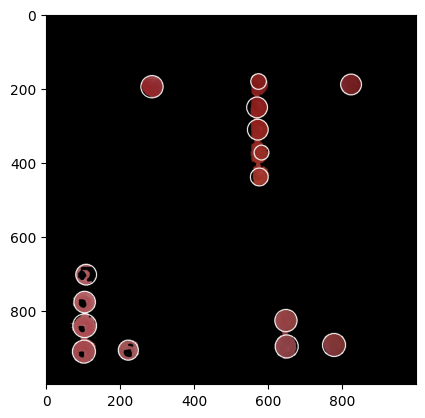

In [123]:
#detect red

img_hsv=cv2.cvtColor(board_, cv2.COLOR_RGB2HSV)


# lower mask (0-10)
lb = 100
lower_red = np.array([0,lb,lb])
upper_red = np.array([4,255,255])
mask0 = cv2.inRange(img_hsv, lower_red, upper_red)

# upper mask (170-180)
lower_red = np.array([170,lb,lb])
upper_red = np.array([180,255,255])
mask1 = cv2.inRange(img_hsv, lower_red, upper_red)

# plt.imshow(np.concatenate([mask0, mask1], axis=1))
# plt.show()

k1 = np.ones((5,5))

# join my masks
redmask = mask0+mask1
redmask = cv2.erode(redmask, k1)
#redmask = cv2.erode(redmask, k1)
#redmask = cv2.erode(redmask, k1)
#redmask = cv2.dilate(redmask, k1)
#redmask = cv2.dilate(redmask, k1)
#redmask = cv2.dilate(redmask, k2)
#redmask = cv2.dilate(redmask, k2)
#redmask = cv2.dilate(redmask, k2)

plt.imshow(redmask)
plt.show()

redboard = np.array(board_)
redboard[redmask==0] = 0
# redboard = cv2.cvtColor(redboard, cv2.COLOR_RGB2GRAY)

minDist = 30
param1 = 40 #500
param2 = 9 #200 #smaller value-> more false circles
minRadius = 20
maxRadius = 40 #10


circles = cv2.HoughCircles(redmask,cv2.HOUGH_GRADIENT, 1, minDist, param1=param1, param2=param2, minRadius=minRadius, maxRadius=maxRadius)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
        cv2.circle(redboard, (i[0], i[1]), i[2], (255, 255, 255), 2)

# Show result for testing:
plt.imshow(redboard)
plt.show()

# output_img = np.array(board_)
# output_img[np.where(redmask==0)] = 0

# plt.imshow(output_img)
# plt.show()

# contours, _ = cv2.findContours(redmask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# red_pawns = np.array(board_)

# cv2.drawContours(red_pawns, contours, -1, (0, 255, 0), 2)

# plt.imshow(red_pawns)
# plt.show()

In [102]:
#detect pawns

minDist = 50
param1 = 30 #500
param2 = 15 #200 #smaller value-> more false circles
minRadius = 30
maxRadius = 40 #10


# board_ = cv2.GaussianBlur(board_, (5,5),0)
# board_ = cv2.blur(board_, (5,5))

# circles = cv2.HoughCircles(board_,cv2.HOUGH_GRADIENT, 1, minDist, param1=param1, param2=param2, minRadius=minRadius, maxRadius=maxRadius)


# if circles is not None:
#     circles = np.uint16(np.around(circles))
#     for i in circles[0,:]:
#         cv2.circle(board_, (i[0], i[1]), i[2], (0, 255, 0), 2)

# # Show result for testing:
# plt.imshow(board_)
# plt.show()

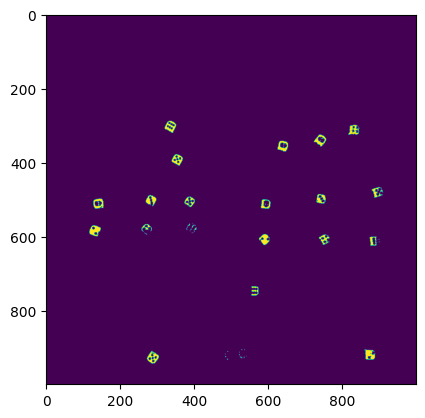

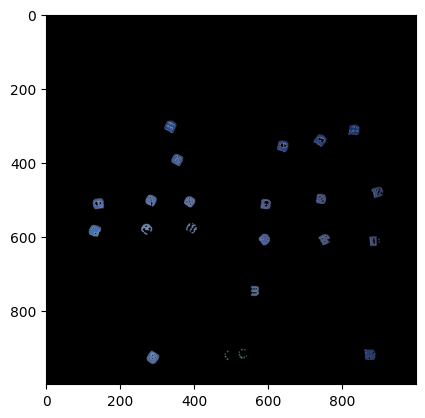

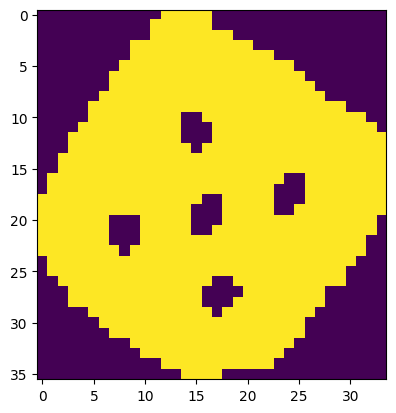

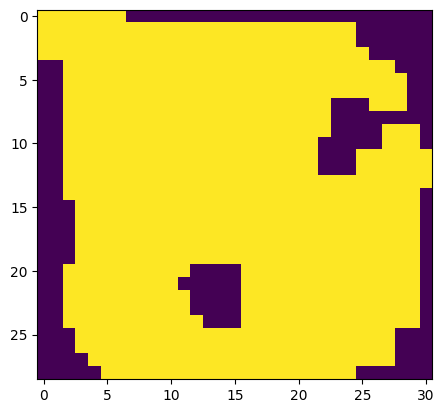

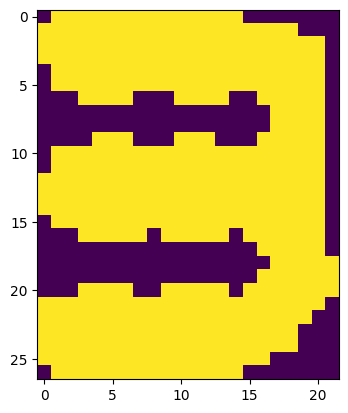

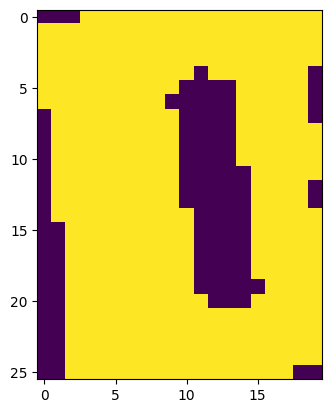

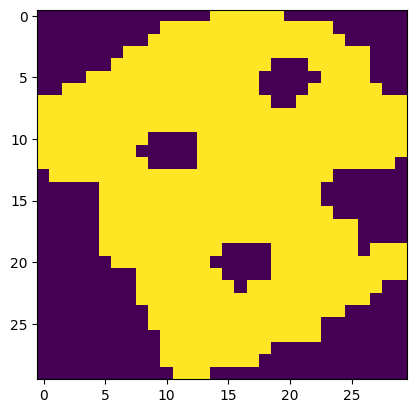

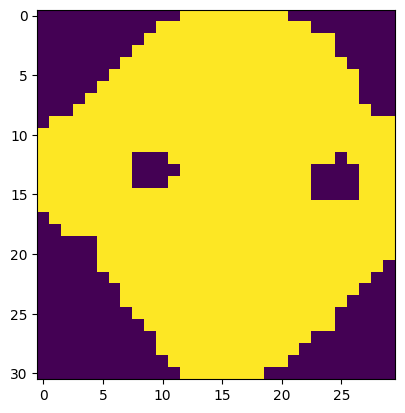

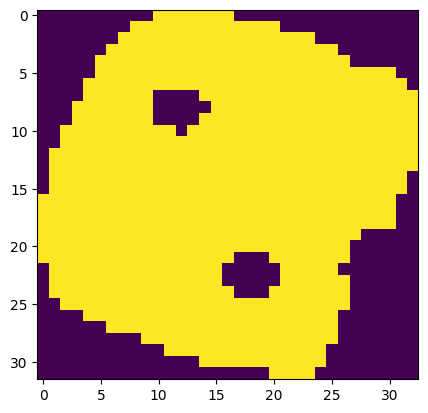

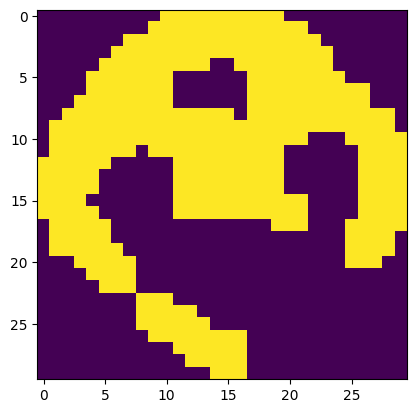

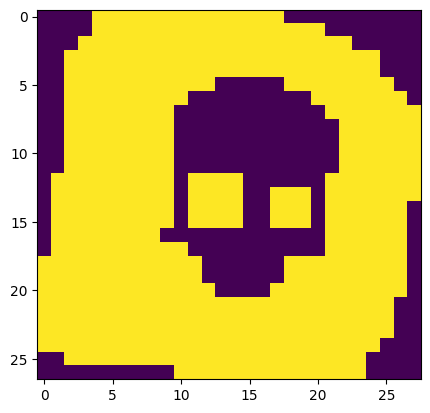

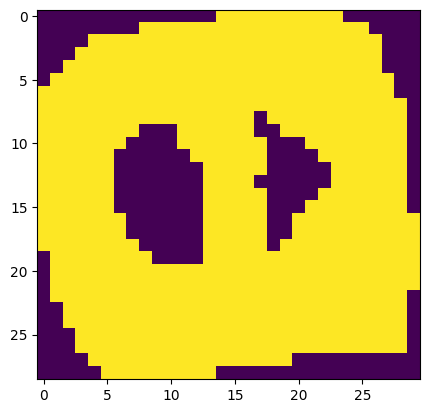

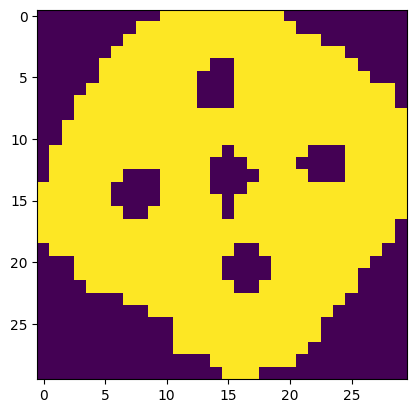

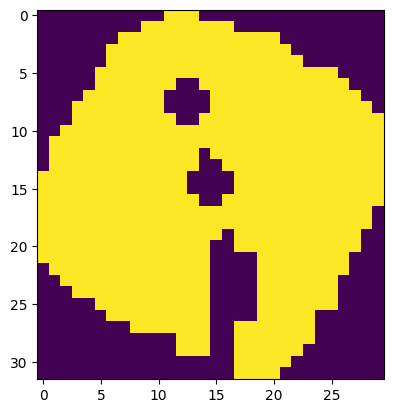

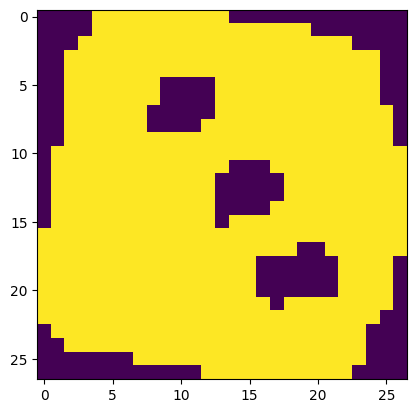

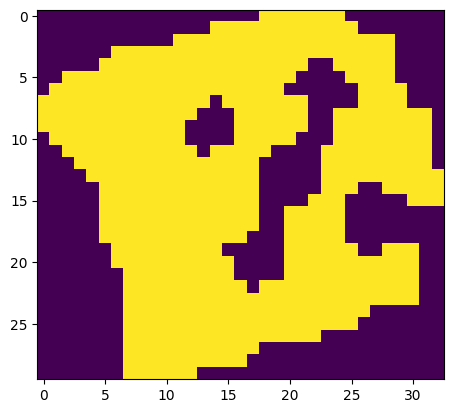

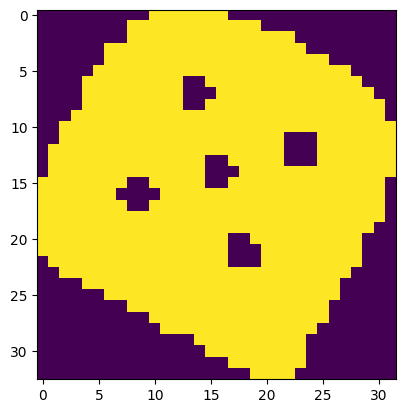

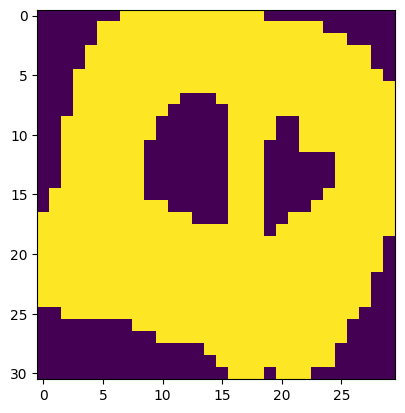

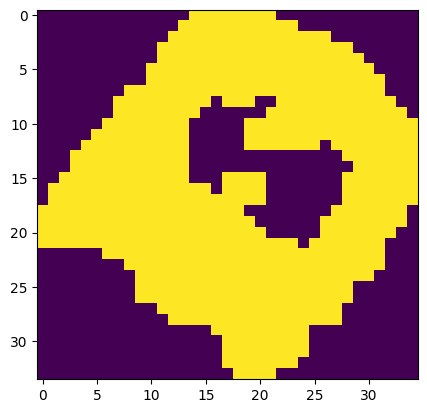

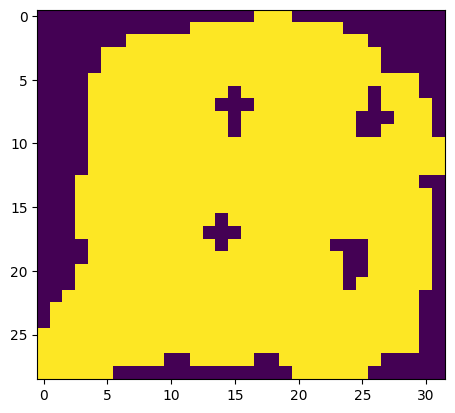

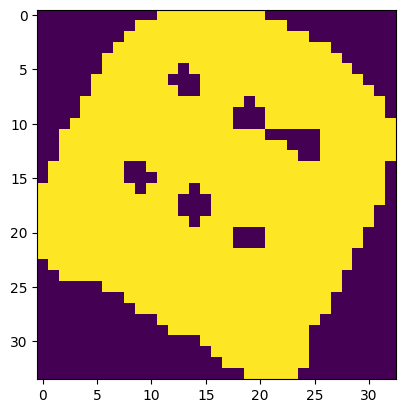

In [107]:
#detect dice new
img_hsv=cv2.cvtColor(board_, cv2.COLOR_RGB2HSV)

k = np.ones((3,3))
# lower mask (0-10)
lb = 100
lower_red = np.array([60,lb,lb])
upper_red = np.array([150,255,255])
mask0 = cv2.inRange(img_hsv, lower_red, upper_red)

plt.imshow(mask0)
plt.show()

# join my masks
redmask = mask0
redmask = cv2.dilate(redmask, k)

output_img = np.array(board_)
output_img[np.where(redmask==0)] = 0

plt.imshow(output_img)
plt.show()


cnts = cv2.findContours(redmask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]


dices = []
min_area = 100
max_area = 1000
for c in cnts:
    area = cv2.contourArea(c)
    if area > min_area and area < max_area:
        x,y,w,h = cv2.boundingRect(c)
        dices.append(redmask[y:y+h, x:x+w])
        #cv2.rectangle(board_, (x, y), (x + w, y + h), (36,255,12), 2)

#detector = cv2.SimpleBlobDetector()
for dice in dices:
    plt.imshow(dice)
    plt.show()
    # blobs = detector.detect(dice)
    # im_with_keypoints = cv2.drawKeypoints(board_, blobs, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    # plt.imshow(im_with_keypoints)
    # plt.show()